**DATA ANALYSIS AND VISUALIZATION OF THE EFFECT OF CORONA VIRUS**
-Also involves segmentation and clustering the effect of corona virus on the basis of population density

**DATA SCIENCE PROJECT BY SHYAM SANKAR**

In [2]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes #uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


LOADING THE CSV FILE AND CONVERTING IT INTO A PANDAS DATAFRAME

In [0]:
url="https://raw.githubusercontent.com/shyamsankar11102000/Corona_Virus_Analysis/master/2019_nC0v_20200121_20200126%20-%20SUMMARY%20-%202019_nC0v_20200121_20200126%20-%20SUMMARY%20(1).csv"
df=pd.read_csv(url) #error_bad_lines=False)

GETTING THE LATEST DATA 

In [0]:
df=df[df["Date last updated"]=="1/26/2020 11:00 AM"]

In [0]:
df.head()

,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths,Population_density,Chinese_province_names
322,Hubei,Mainland China,1/26/2020 11:00 AM,1058.0,NaN,42.0,52.0,2804.0,湖北省
323,Guangdong,Mainland China,1/26/2020 11:00 AM,111.0,NaN,2.0,NaN,3469.0,广东省
324,Zhejiang,Mainland China,1/26/2020 11:00 AM,104.0,NaN,1.0,NaN,2137.0,浙江省
325,Henan,Mainland China,1/26/2020 11:00 AM,83.0,3.0,NaN,1.0,4903.0,河南省
326,Chongqing,Mainland China,1/26/2020 11:00 AM,75.0,NaN,NaN,NaN,2026.0,重庆市


REPLACING ALL THE NAN VALUES WITH ZERO VALUE

In [5]:
df['Confirmed'].replace(np.nan,"0",inplace=True)
df['Recovered'].replace(np.nan,"0",inplace=True)
df['Suspected'].replace(np.nan,"0",inplace=True)
df['Deaths'].replace(np.nan,"0",inplace=True)
df.head()

,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths,Population_density,Chinese_province_names
322,Hubei,Mainland China,1/26/2020 11:00 AM,1058.0,0,42,52,2804.0,湖北省
323,Guangdong,Mainland China,1/26/2020 11:00 AM,111.0,0,2,0,3469.0,广东省
324,Zhejiang,Mainland China,1/26/2020 11:00 AM,104.0,0,1,0,2137.0,浙江省
325,Henan,Mainland China,1/26/2020 11:00 AM,83.0,3,0,1,4903.0,河南省
326,Chongqing,Mainland China,1/26/2020 11:00 AM,75.0,0,0,0,2026.0,重庆市


In [0]:
df.shape

(46, 9)

FILTERING DATA TO OBTAIN DATA ONLY FOR PROVINCES AND STATES IN MAINLAND CHINA

In [6]:
df=df[df.Country=="Mainland China"]	

df.shape


(30, 9)

LOADING THE CSV FILE CONTAINING INFORMATION ON THE COORDINATES AND THE POPULATION OF EACH STATE AND PROVINCE

In [7]:
url2="https://raw.githubusercontent.com/shyamsankar11102000/Corona_Virus_Analysis/master/cn.csv"
df_coo=pd.read_csv(url2)
df_coo.rename(columns={"admin":"Province/State"},inplace=True)
df_coo=df_coo.drop_duplicates(subset=['Province/State'])

df_coo



,city,lat,lng,country,iso2,Province/State,capital,population,population_proper
0,Shanghai,31.222222,121.458056,China,CN,Shanghai,admin,14987000.0,14608512.0
1,Beijing,39.928819,116.388869,China,CN,Beijing,primary,11106000.0,7480601.0
2,Guangzhou,23.116667,113.250000,China,CN,Guangdong,admin,8829000.0,3152825.0
4,Wuhan,30.583333,114.266667,China,CN,Hubei,admin,7243000.0,4184206.0
5,Tianjin,39.142222,117.176667,China,CN,Tianjin,admin,7180000.0,3766207.0
6,Chongqing,29.562778,106.552778,China,CN,Chongqing,admin,6461000.0,3967028.0
7,Shenyang,41.792222,123.432778,China,CN,Liaoning,admin,4787000.0,3512192.0
9,Chengdu,30.666667,104.066667,China,CN,Sichuan,admin,4123000.0,3950437.0
10,Lianhu,34.258479,108.924205,China,CN,Shaanxi,minor,4009000.0,3225812.0
11,Hechi,23.002700,109.840000,China,CN,Guangxi,NaN,3830000.0,2720379.0


df_china WILL ACT AS THE PRIMARY DATA FRAME FOR MOST OF THE VISUALIZATION AND ANALYSIS IN THE FURTHER SECTIONS

In [8]:

df_pos = pd.merge(df, df_coo, on=['Province/State'], how='inner')

df_china = df_pos[['Province/State','Country', 'lat', 'lng','Confirmed','Suspected','Recovered','Deaths','Population_density','Chinese_province_names']]

df_china

,Province/State,Country,lat,lng,Confirmed,Suspected,Recovered,Deaths,Population_density,Chinese_province_names
0,Hubei,Mainland China,30.583333,114.266667,1058.0,0,42,52,2804.0,湖北省
1,Guangdong,Mainland China,23.116667,113.250000,111.0,0,2,0,3469.0,广东省
2,Zhejiang,Mainland China,30.293650,120.161419,104.0,0,1,0,2137.0,浙江省
3,Henan,Mainland China,34.683611,113.532500,83.0,3,0,1,4903.0,河南省
4,Chongqing,Mainland China,29.562778,106.552778,75.0,0,0,0,2026.0,重庆市
5,Hunan,Mainland China,28.200000,112.966667,69.0,0,0,0,3174.0,湖南省
6,Beijing,Mainland China,39.928819,116.388869,68.0,0,2,0,1136.0,北京市
7,Anhui,Mainland China,31.863889,117.280833,60.0,4,0,0,2559.0,安徽省
8,Shandong,Mainland China,36.790556,118.063333,46.0,0,0,0,1750.0,山东省
9,Sichuan,Mainland China,30.666667,104.066667,44.0,4,0,0,3068.0,四川省


GETTING THE LATITUDE AND LONGITUEDE OF CHINA USING GEOLOCATOR

In [9]:
address = 'China'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the China are {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of the China are 35.000074, 104.999927.


THE JSON FILE THAT HAS DATA ON THE BOUNDARIES OF PROVINCES AND STATES IN CHINA

In [0]:
!wget --quiet https://raw.githubusercontent.com/longwosion/geojson-map-china/master/china.json -O china_provinces.json
china_geo = r'china_provinces.json'
map_china = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Mapbox Bright')

CHOROPLETH MAP SHOWING THE CONFIRMED CASES OF CORONA VIRUS 

In [43]:
folium.Choropleth(
    geo_data=china_geo,
    data=df_china,
    columns=['Chinese_province_names', 'Confirmed'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Confirmed cases due to corona virus'
).add_to(map_china)
map_china

In [0]:
def plot_count(feature, value, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    g = sns.barplot(df[feature], df[value],  palette='Set3')
    g.set_title("Number of {}".format(title))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()  

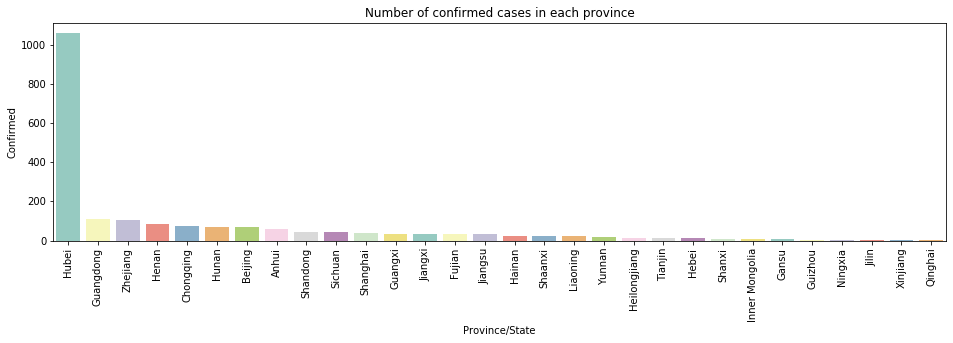

In [13]:
import seaborn as sns
filtered_data_last = df_china.drop_duplicates(subset = ['Province/State'],keep='first')
plot_count('Province/State', 'Confirmed','confirmed cases in each province', filtered_data_last, size=4)

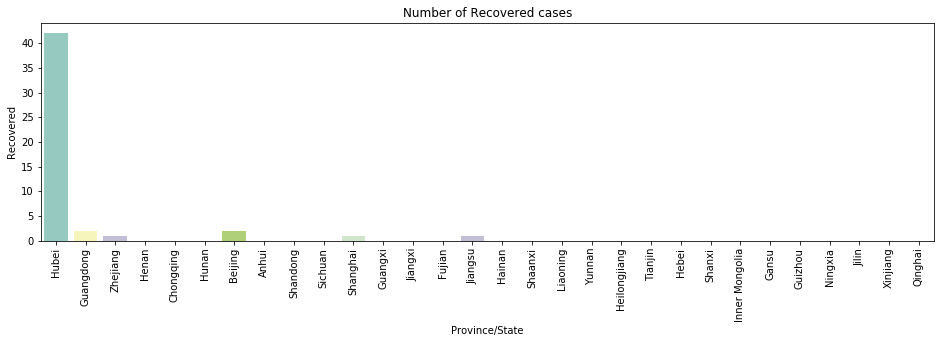

In [14]:
plot_count('Province/State', 'Recovered', 'Recovered cases', filtered_data_last, size=4)



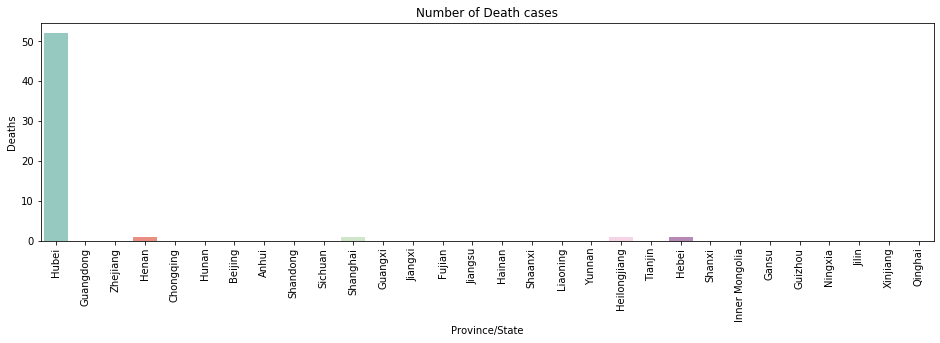

In [15]:
plot_count('Province/State', 'Deaths', 'Death cases', filtered_data_last, size=4)

Excluding hubei

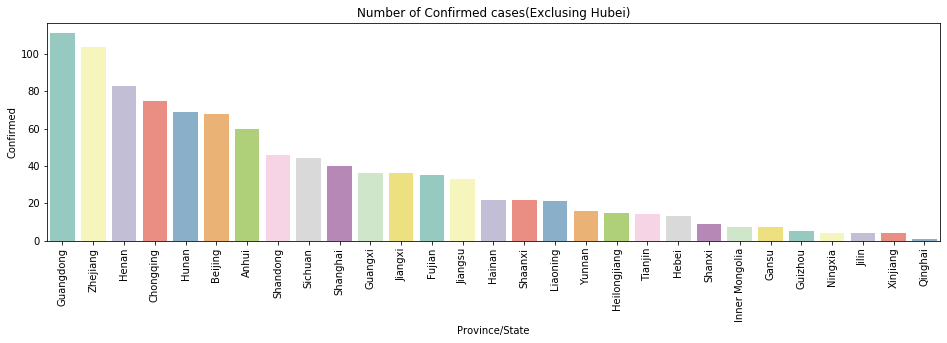

In [16]:
df_hubei_dropped=df_china.drop(df_china.index[0])

filtered_data_last = df_hubei_dropped.drop_duplicates(subset = ['Province/State'],keep='first')
plot_count('Province/State', 'Confirmed','Confirmed cases(Exclusing Hubei)', filtered_data_last, size=4)

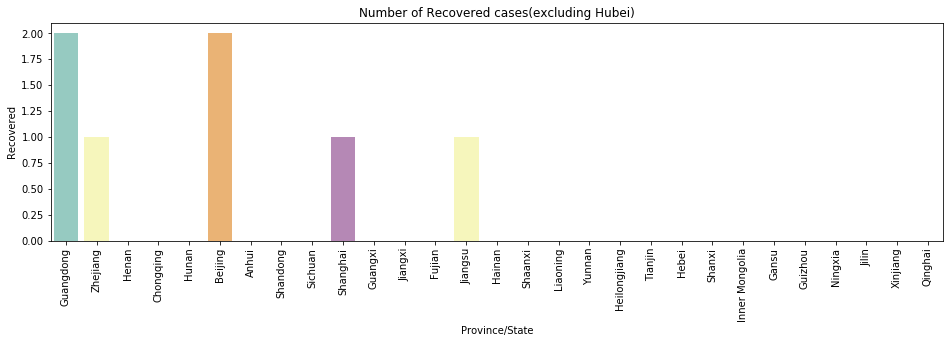

In [17]:
plot_count('Province/State', 'Recovered', 'Recovered cases(excluding Hubei)', filtered_data_last, size=4)



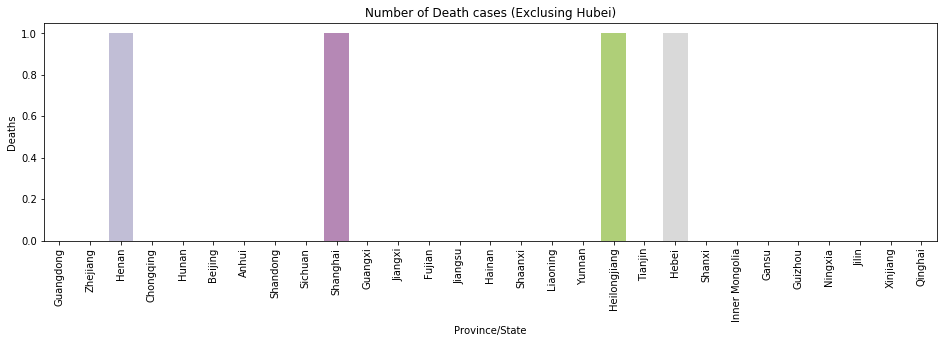

In [18]:
plot_count('Province/State', 'Deaths', 'Death cases (Exclusing Hubei)', filtered_data_last, size=4)

In [0]:
!wget --quiet https://raw.githubusercontent.com/longwosion/geojson-map-china/master/china.json -O china_provinces.json
china_geo = r'china_provinces.json'
map_hubei_dropped = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Mapbox Bright')

In [23]:
folium.Choropleth(
    geo_data=china_geo,
    data=df_hubei_dropped,
    columns=['Chinese_province_names', 'Confirmed'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Confirmed cases due to corona virus'
).add_to(map_hubei_dropped)
map_hubei_dropped

# CLUSTERING AND SEGMENTATION USING K-MEANS

SCATTERED PLOT OF POPULATION DENSITY VS CONFIRMED CASES

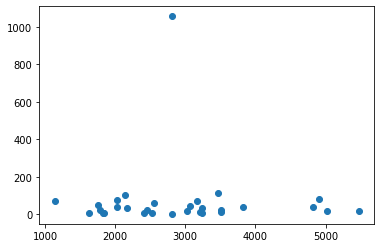

In [27]:
from matplotlib import pyplot as plt
X=df_china['Population_density']
Y=df_china['Confirmed']
plt.scatter(X,Y)

SCATTERED PLOT OF POPULATION DENSITY VS CONFIRMED CASES (EXCLUDING HUBEI)

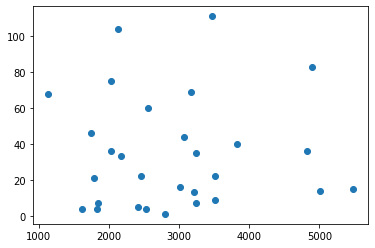

In [28]:

M=df_hubei_dropped['Population_density']
K=df_hubei_dropped['Confirmed']
plt.scatter(M,K)

USING THE ELBOW METHOD TO FIND THE OPTIMUM NUMBER OF CLUSTERS

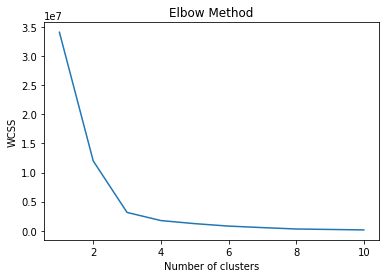

In [29]:
X1 = df_hubei_dropped[['Population_density' , 'Confirmed']].iloc[: , :].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
kclusters=3
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X1)
kmeans.labels_[0:10]

array([0, 1, 2, 1, 0, 1, 1, 1, 0, 0], dtype=int32)

PROVINCES WITH CLSUTER LABELS


In [31]:
df_hubei_dropped.insert(1,'Cluster value',kmeans.labels_)
df_hubei_dropped

,Province/State,Cluster value,Country,lat,lng,Confirmed,Suspected,Recovered,Deaths,Population_density,Chinese_province_names
1,Guangdong,0,Mainland China,23.116667,113.250000,111.0,0,2,0,3469.0,广东省
2,Zhejiang,1,Mainland China,30.293650,120.161419,104.0,0,1,0,2137.0,浙江省
3,Henan,2,Mainland China,34.683611,113.532500,83.0,3,0,1,4903.0,河南省
4,Chongqing,1,Mainland China,29.562778,106.552778,75.0,0,0,0,2026.0,重庆市
5,Hunan,0,Mainland China,28.200000,112.966667,69.0,0,0,0,3174.0,湖南省
6,Beijing,1,Mainland China,39.928819,116.388869,68.0,0,2,0,1136.0,北京市
7,Anhui,1,Mainland China,31.863889,117.280833,60.0,4,0,0,2559.0,安徽省
8,Shandong,1,Mainland China,36.790556,118.063333,46.0,0,0,0,1750.0,山东省
9,Sichuan,0,Mainland China,30.666667,104.066667,44.0,4,0,0,3068.0,四川省
10,Shanghai,0,Mainland China,31.222222,121.458056,40.0,72,1,1,3823.0,上海市


Examining the first cluster


In [40]:
df_cluster0=df_hubei_dropped.loc[df_hubei_dropped['Cluster value'] == 0]
df_cluster0

,Province/State,Cluster value,Country,lat,lng,Confirmed,Suspected,Recovered,Deaths,Population_density,Chinese_province_names
1,Guangdong,0,Mainland China,23.116667,113.250000,111.0,0,2,0,3469.0,广东省
5,Hunan,0,Mainland China,28.200000,112.966667,69.0,0,0,0,3174.0,湖南省
9,Sichuan,0,Mainland China,30.666667,104.066667,44.0,4,0,0,3068.0,四川省
10,Shanghai,0,Mainland China,31.222222,121.458056,40.0,72,1,1,3823.0,上海市
13,Fujian,0,Mainland China,24.513333,117.655556,35.0,20,0,0,3238.0,福建省
16,Shaanxi,0,Mainland China,34.258479,108.924205,22.0,0,0,0,3514.0,山西省
18,Yunnan,0,Mainland China,25.038889,102.718333,16.0,36,0,0,3021.0,云南省
21,Hebei,0,Mainland China,38.041389,114.478611,13.0,0,0,1,3210.0,河北省
22,Shanxi,0,Mainland China,37.869444,112.560278,9.0,0,0,0,3514.0,山西省
24,Gansu,0,Mainland China,36.057006,103.839868,7.0,0,0,0,3237.0,甘肃省


Examining the second cluster

In [41]:
df_cluster1=df_hubei_dropped.loc[df_hubei_dropped['Cluster value'] == 1]
df_cluster1

,Province/State,Cluster value,Country,lat,lng,Confirmed,Suspected,Recovered,Deaths,Population_density,Chinese_province_names
2,Zhejiang,1,Mainland China,30.293650,120.161419,104.0,0,1,0,2137.0,浙江省
4,Chongqing,1,Mainland China,29.562778,106.552778,75.0,0,0,0,2026.0,重庆市
6,Beijing,1,Mainland China,39.928819,116.388869,68.0,0,2,0,1136.0,北京市
7,Anhui,1,Mainland China,31.863889,117.280833,60.0,4,0,0,2559.0,安徽省
8,Shandong,1,Mainland China,36.790556,118.063333,46.0,0,0,0,1750.0,山东省
11,Guangxi,1,Mainland China,23.002700,109.840000,36.0,0,0,0,2025.0,广西壮族自治区
14,Jiangsu,1,Mainland China,32.061667,118.777778,33.0,0,1,0,2176.0,江苏省
15,Hainan,1,Mainland China,20.045833,110.341667,22.0,0,0,0,2460.0,海南省
17,Liaoning,1,Mainland China,41.792222,123.432778,21.0,0,0,0,1782.0,辽宁省
23,Inner Mongolia,1,Mainland China,40.652222,109.822222,7.0,0,0,0,1846.0,内蒙古自治区


Examining the third cluster

In [42]:
df_cluster2=df_hubei_dropped.loc[df_hubei_dropped['Cluster value'] == 2]
df_cluster2

,Province/State,Cluster value,Country,lat,lng,Confirmed,Suspected,Recovered,Deaths,Population_density,Chinese_province_names
3,Henan,2,Mainland China,34.683611,113.532500,83.0,3,0,1,4903.0,河南省
12,Jiangxi,2,Mainland China,28.655758,115.905049,36.0,0,0,0,4818.0,江西省
19,Heilongjiang,2,Mainland China,45.750000,126.650000,15.0,0,0,1,5476.0,黑龙江省
20,Tianjin,2,Mainland China,39.142222,117.176667,14.0,0,0,0,5016.0,天津市
